In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams["figure.figsize"] = 15, 5
sns.set_style("darkgrid")

In [56]:
cc_df = pd.read_csv("cc.csv")
cc_df.drop("CUST_ID", axis=1 , inplace = True)
cc_df["MINIMUM_PAYMENTS"].fillna(value = cc_df["MINIMUM_PAYMENTS"].mean(), inplace = True)
cc_df["CREDIT_LIMIT"].fillna(value = cc_df["CREDIT_LIMIT"].mean(), inplace = True)
cc_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [57]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [58]:
cc_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:ylabel='count'>

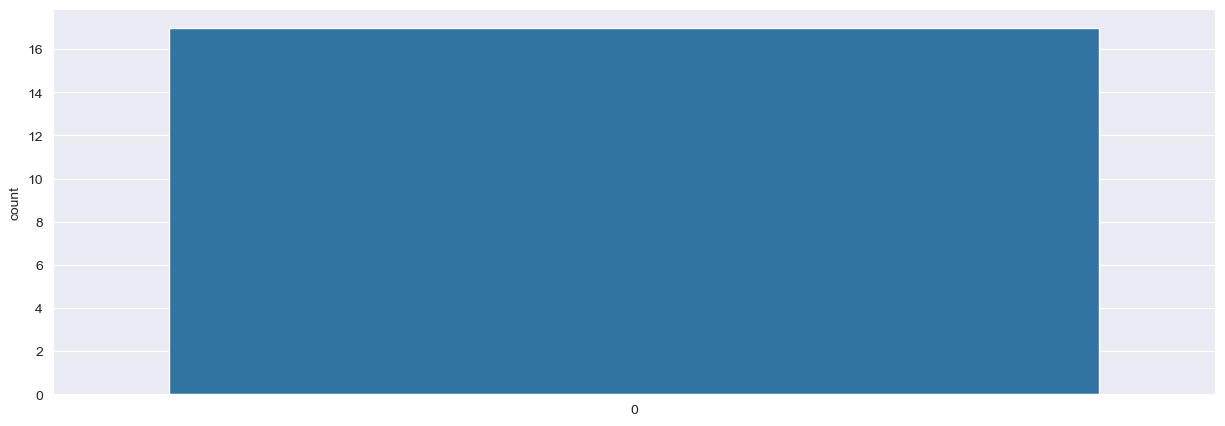

In [59]:
sns.countplot(x=cc_df.isnull().sum())

<AxesSubplot:>

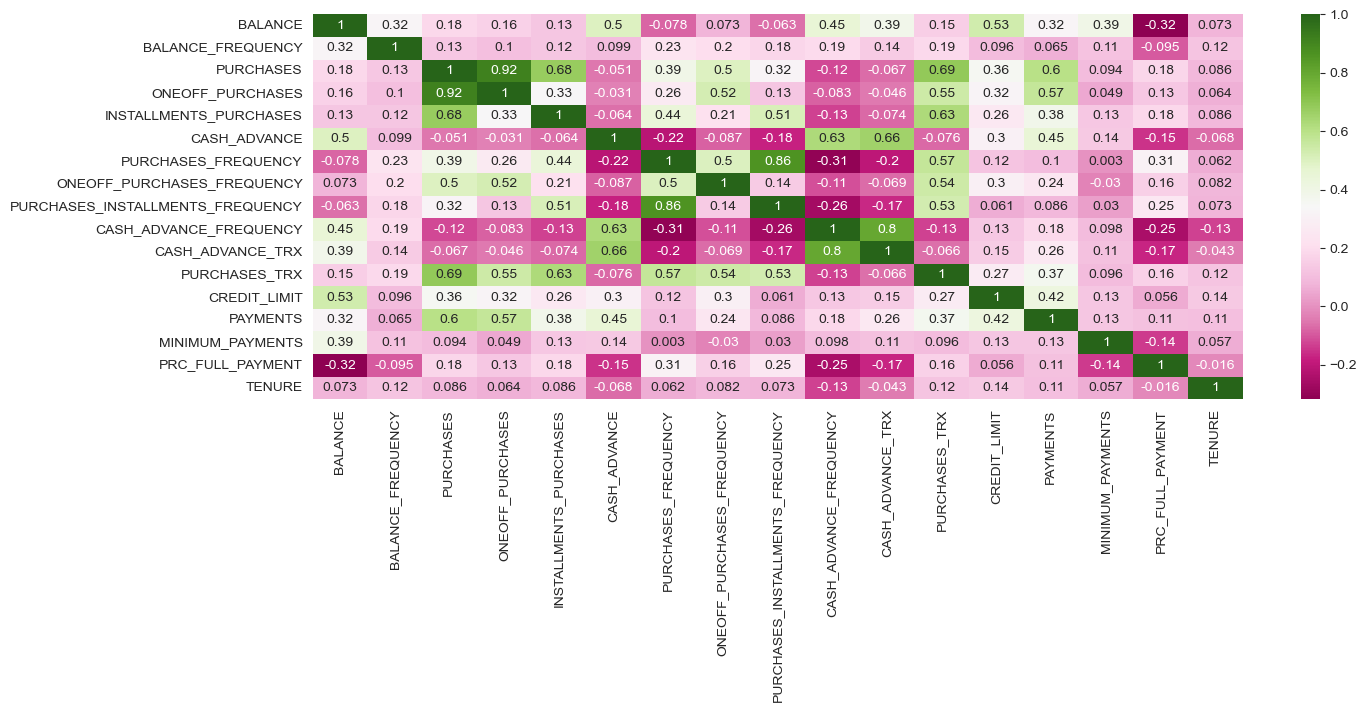

In [60]:
sns.heatmap(cc_df.corr(), annot = True, cmap="PiYG")

In [61]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
scaled_df =  scaler.fit_transform(cc_df)
normalized_df = normalize(scaled_df)
normalize_df = pd.DataFrame(data = normalized_df)

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
x_principal = pca.fit_transform(normalize_df)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ["P1","P2"]
x_principal.head()


,P1,P2
0,-0.489826,-0.679679
1,-0.518791,0.545008
2,0.330885,0.268980
3,-0.482373,-0.092113
4,-0.563289,-0.481914


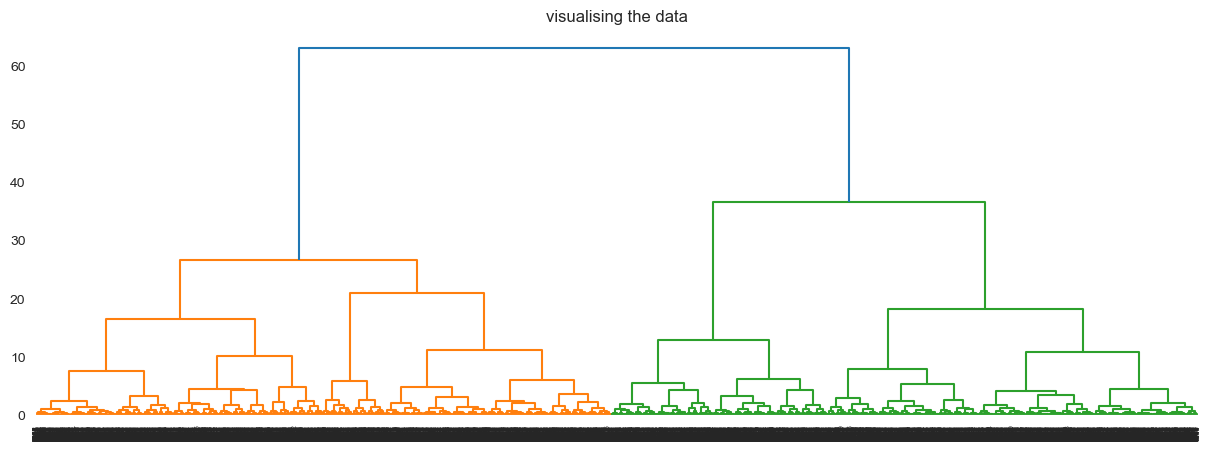

In [63]:
import scipy.cluster.hierarchy as shc

plt.title('visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(x_principal, method ='ward')))

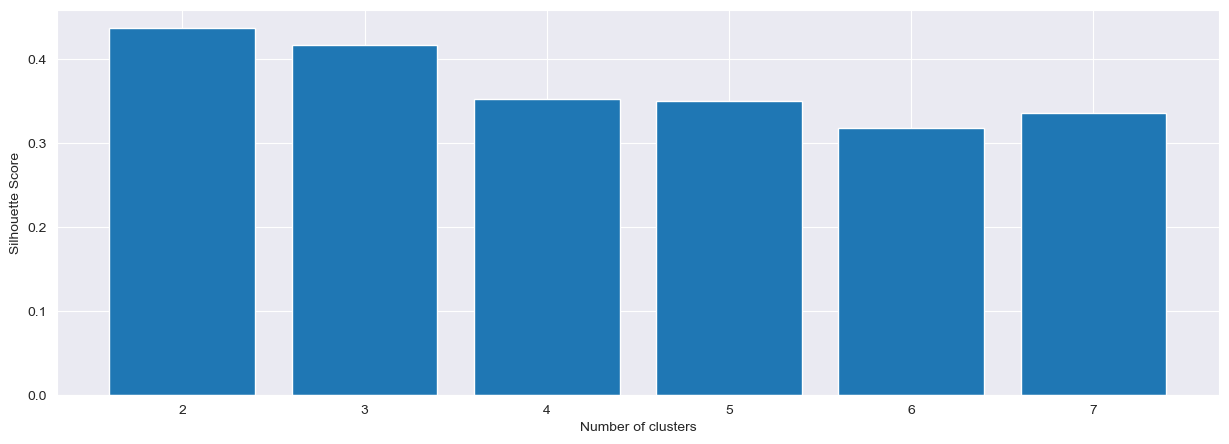

In [64]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
silhouette_scores = []
for n_cluster in range(2, 8):
    silhouette_scores.append(silhouette_score(x_principal,
                                              AgglomerativeClustering(n_clusters = n_cluster).fit_predict(x_principal))) 
    
plt.bar(x=range(2, 8), height=silhouette_scores) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show()

In [65]:
agg = AgglomerativeClustering(n_clusters = 3)
agg.fit(x_principal)

AgglomerativeClustering(n_clusters=3)

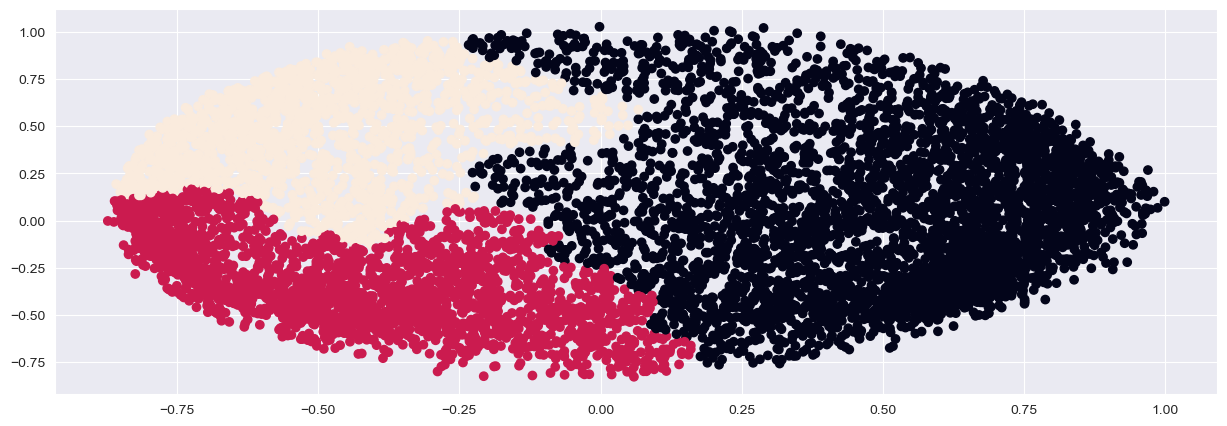

In [66]:
plt.scatter(x_principal["P1"], x_principal["P2"], c = AgglomerativeClustering(n_clusters = 3).fit_predict(x_principal))
plt.show()

In [67]:
#different data set
test = pd.read_csv("diabetes.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [68]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(test)
normalized_df = normalize(scaled_df)
normalized_df = pd.DataFrame(data = normalized_df)

In [69]:
pcaD = PCA(n_components=2)
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ["P1", "P2"]
X_principal.head()

,P1,P2
0,0.912320,-0.038968
1,-0.742283,-0.034882
2,0.573920,-0.476803
3,-0.826933,0.136201
4,0.332232,0.468638


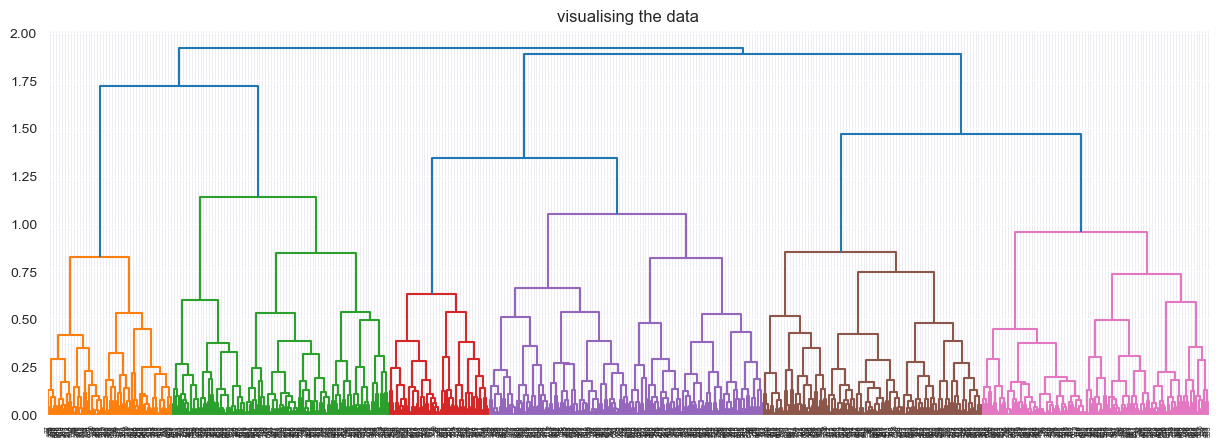

In [70]:
plt.title("visualising the data")
dendo = shc.dendrogram((shc.linkage(X_principal, method = "complete")))

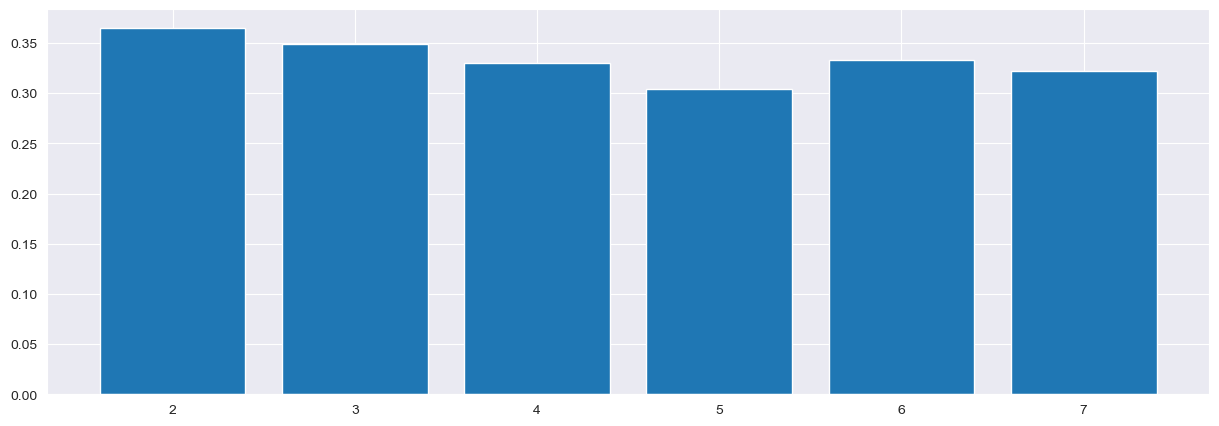

In [71]:
sil_scores = []
for i in range(2, 8):
    sil_scores.append(silhouette_score(X_principal,
                                       AgglomerativeClustering(n_clusters = i).fit_predict(X_principal)))
plt.bar(x = range(2,8), height=sil_scores)
plt.show()

In [72]:
agg = AgglomerativeClustering(n_clusters=6)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=6)

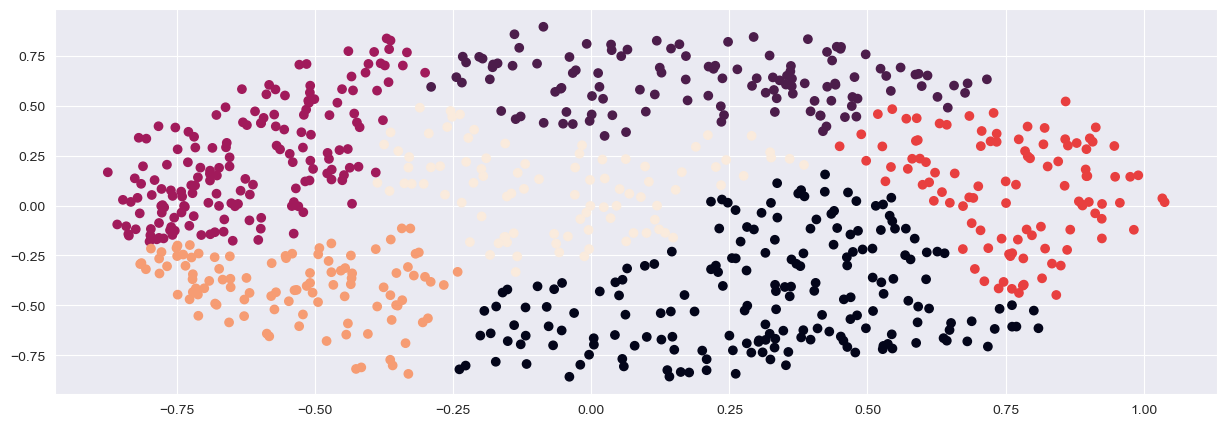

In [73]:
plt.scatter(X_principal["P1"], X_principal["P2"], c = AgglomerativeClustering(n_clusters=6).fit_predict(X_principal))
plt.show()